
# Project: Investigate a Dataset (IMDB database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This project will analyse the IMDB dataset. The fields included in the dataset are:
id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj


For the purpose of this project the main focus will be on how different film genres perform. The questions that we will try to answer are:
1. What are the most common film genres released in recent years?
2. How successfull are each of the genres in terms of profit made on a film?
3. What is the trend for how popular a genre is for each year?
4. Since we can't assume success is based only on the genre of a movie we will take a look at some other factors. Firslty we will analyse which quarter had the most profit over the last few years.
5. Do the films with a higher vote average have a higher profit?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


In [2]:
data = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

Take a look at what data is included in the dataset.

In [3]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We would like to analyse the profits made so we need to calculate it by subtracting the budget from revenue for each film

In [4]:
data['profit'] = data['revenue'] - data['budget']


In [5]:
data.shape

(10866, 22)

The data set is quite large so we will make the set of info a but smaller by only considering films released since the year 2000

In [6]:
data = data[data.release_year >= 2000]

In [7]:
data.shape

(7168, 22)

The data contains 22 variables and 7168 rows after we removed films that were released before the year 2000.
First, take a quick look at the data above to see if we need to clean or trim any of the data. On first look these points were made:
1. Cast, genres and production companies fields contain lists that are seperated by |. We will need to seperate out the genres in order to analyse them properly.
2. Overview, tagline and homepage fields will not be useful for data analysis as they contain strings that are unique to each film so you can't compare these fields. We won't include these fields in the new table made. 
3. Budget and revenue figures are reported as exponentials so make sure whe analysing them to take this into account. 
4. Note: release date is in American format of month/date/year. 
5. Make a column that shows which quarter each release date is in.

### Data Cleaning 

First, create a new table with just the fields that we're inteersted in

In [8]:
new_dataset = data.filter(['profit','original_title', 'genres', 'release_date', 'release_year', 'vote_average'], axis=1)

In [9]:
new_dataset.head()

,profit,original_title,genres,release_date,release_year,vote_average
0,1363528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,6.5
1,228436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,7.1
2,185238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15,2015,6.3
3,1868178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,7.5
4,1316249360,Furious 7,Action|Crime|Thriller,4/1/15,2015,7.3


Next, remove | from the lists of genres

In [10]:
#First create a dataframe that just contains the genres
seperate_genres = new_dataset['genres'].str.split('|').apply(pd.Series, 1).stack()
seperate_genres.index = seperate_genres.index.droplevel(-1)
seperate_genres.name = 'genres'
#delete the original genres column from the dataset
del new_dataset['genres']
#merge the two dataframes together
final_dataframe = new_dataset.join(seperate_genres)

In [11]:
final_dataframe.head()

,profit,original_title,release_date,release_year,vote_average,genres
0,1363528810,Jurassic World,6/9/15,2015,6.5,Action
0,1363528810,Jurassic World,6/9/15,2015,6.5,Adventure
0,1363528810,Jurassic World,6/9/15,2015,6.5,Science Fiction
0,1363528810,Jurassic World,6/9/15,2015,6.5,Thriller
1,228436354,Mad Max: Fury Road,5/13/15,2015,7.1,Action


We will be analysing movies by what quarter they were released in so change the release date to a number depending on which quarter it was released in.
Movies released: 
* January - March = 1
* April -June = 2
* July - September = 3
* October - December = 4


In [12]:
#Change the format of the date to datetime so we can easily obtain what quarter the film was released in
final_dataframe['release_date'] = pd.to_datetime(final_dataframe['release_date'])
final_dataframe['quarter'] = final_dataframe['release_date'].dt.quarter 
#No longer need the relase date so we can get rid of that column
del final_dataframe['release_date']

The dataset we will be doing analysis on is shown below:

In [13]:
final_dataframe.head()

,profit,original_title,release_year,vote_average,genres,quarter
0,1363528810,Jurassic World,2015,6.5,Action,2
0,1363528810,Jurassic World,2015,6.5,Adventure,2
0,1363528810,Jurassic World,2015,6.5,Science Fiction,2
0,1363528810,Jurassic World,2015,6.5,Thriller,2
1,228436354,Mad Max: Fury Road,2015,7.1,Action,2


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Frequency of genre

In [14]:
#Create a dataframe showing the frequency of each type of genre
freq_genres_df = (pd.DataFrame(final_dataframe.groupby('genres').original_title.nunique())).sort_values('original_title', ascending=False )

In [15]:
freq_genres_df.head()

,original_title
genres,
Drama,3042
Comedy,2385
Thriller,1920
Action,1449
Romance,1076


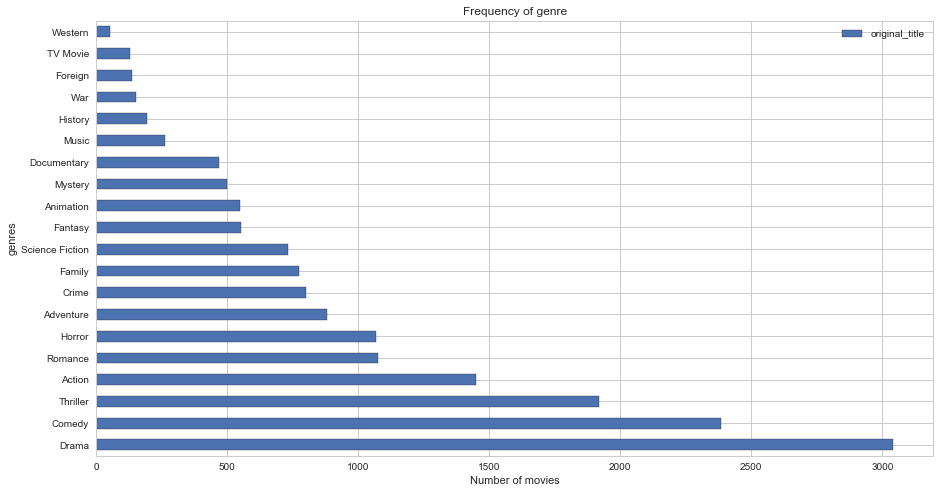

In [25]:
freq_genres_df[['original_title']].plot.barh(stacked=False, title = 'Frequency of genre', figsize=(15, 8));
plt.xlabel('Number of movies')
plt.show()

### 2. Mean profit made in each genre

Create a new dataframe that shows the mean profit made in each genre

In [26]:
profit_and_genres_df = final_dataframe[['original_title', 'profit', 'genres']]
mean_profit_vs_genre_df = profit_and_genres_df.groupby(['genres']).mean()
mean_profit_vs_genre_df.head()


,profit
genres,
Action,5.346547e+07
Adventure,9.758930e+07
Animation,5.723558e+07
Comedy,2.585131e+07
Crime,2.429148e+07


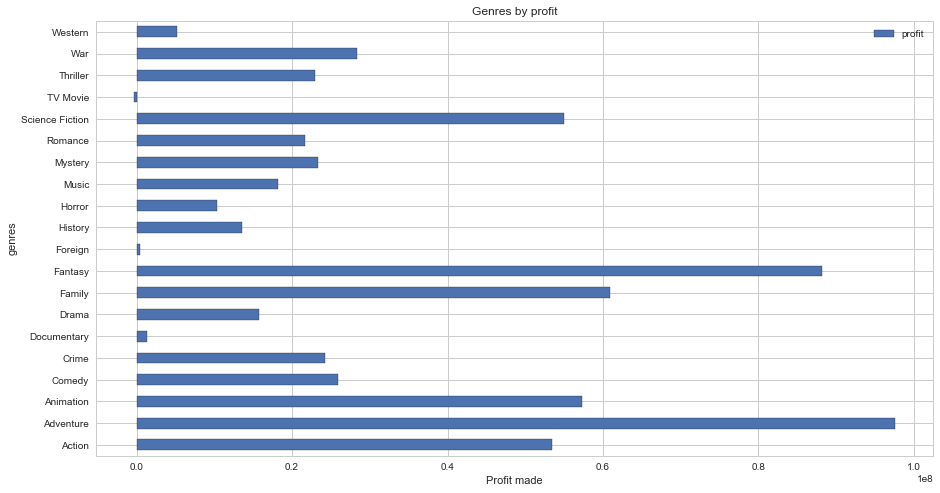

In [29]:
mean_profit_vs_genre_df[['profit']].plot.barh(stacked=False, title = 'Genres by profit', figsize=(15, 8));
plt.xlabel('Profit made')
plt.show()

### 3. Genre ranking for each year

We would like to grah the trends of how much profit genres make each year. Since the data includes 26 
unique genres the graph would be too crowded to clearly read the trends for all of the genres. Therefore we will
just look at the trends of the 10 most frequently produced genres. 

In [30]:
genre_profit_df = final_dataframe[['original_title', 'profit','release_year','genres']]
# Get the mean profit made feach year for each of the genres
genre_ranking_df = genre_profit_df.groupby(['genres', 'release_year'], as_index=False)['profit'].mean()
genre_ranking_df.head()


,genres,release_year,profit
0,Action,2000,3.789718e+07
1,Action,2001,4.233461e+07
2,Action,2002,5.641985e+07
3,Action,2003,6.264511e+07
4,Action,2004,4.261496e+07


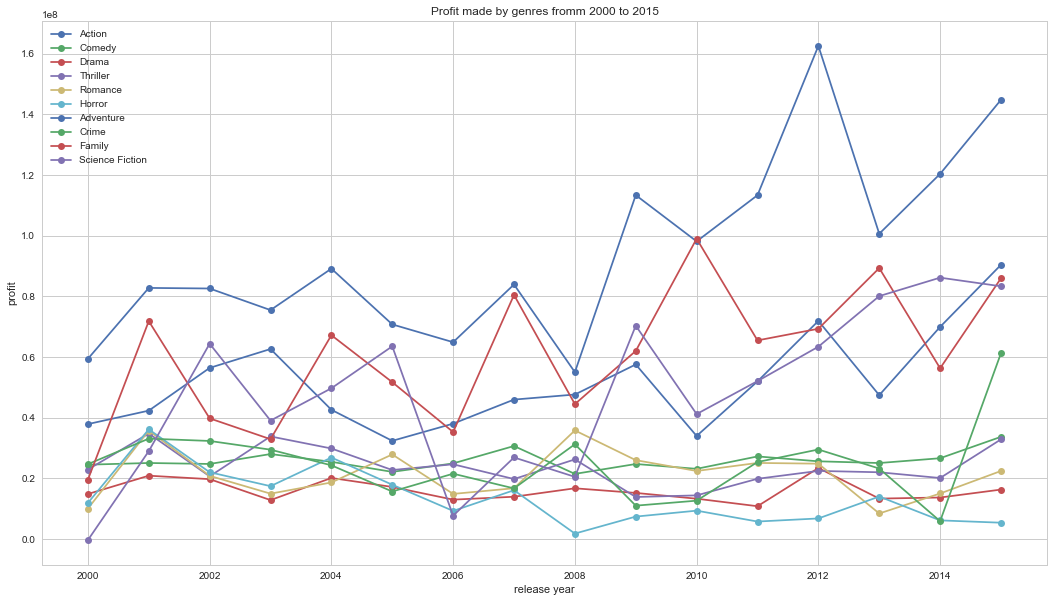

In [46]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(18,10))

for genres in ['Action','Comedy','Drama', 'Thriller', 'Romance', 'Horror', 'Adventure', 'Crime', 'Family', 'Science Fiction']:
    ax.plot(genre_ranking_df[genre_ranking_df.genres==genres].release_year,
            genre_ranking_df[genre_ranking_df.genres==genres].profit,label=genres, marker='o')

ax.set_xlabel("release year")
ax.set_ylabel("profit")
ax.legend(loc='best')
plt.title('Profit made by genres from 2000 to 2015')
plt.show()

### 4. Does a higher vote average yield higher profit made on a film?

In [19]:
profit_and_vote_df = final_dataframe[['original_title', 'profit','vote_average']]
# Get the mean profit made for each vote_average score
mean_profit_vs_vote_avg_df = profit_and_vote_df.groupby(['vote_average']).mean()
mean_profit_vs_vote_avg_df.head()

,profit
vote_average,
1.5,0.000000e+00
2.0,0.000000e+00
2.1,2.602663e+06
2.2,-2.885613e+07
2.3,0.000000e+00


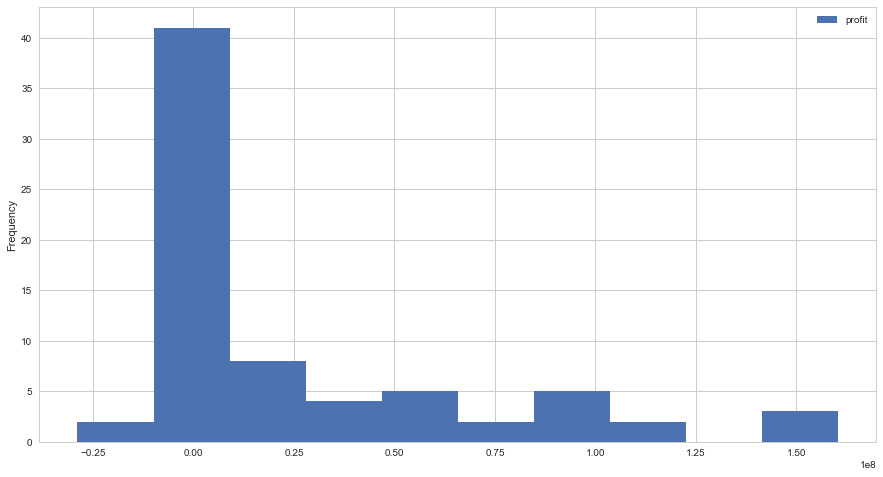

In [20]:
mean_profit_vs_vote_avg_df[['profit']].plot.hist(figsize=(15, 8));
#display edges around histogram bars
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['patch.facecolor'] = 'b'
plt.title('Vote average versus profit')
plt.xlabel('vote average')
plt.ylab
plt.show()

### 5. Which quarters are most profitable?

We will look at the mean profit made in each quarter since the year 2000 in order to see how much profit was made in each quarter.

In [32]:
profit_and_quarter_df = final_dataframe[['original_title', 'profit','quarter']]
# Get the mean profit made for each vote_average score
mean_profit_per_quarter_df = profit_and_quarter_df.groupby(['quarter']).mean()
mean_profit_per_quarter_df.head()

#df7 = (pd.DataFrame(final_dataframe.groupby('quarter').original_title.nunique())).sort_values('original_title', ascending=False)
#df7.head()


,profit
quarter,
1,2.022186e+07
2,5.247864e+07
3,2.268044e+07
4,3.868732e+07


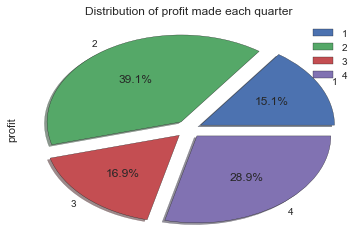

In [42]:
mean_profit_per_quarter_df.plot(kind='pie', y= 'profit', explode = (0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', shadow=True, title='Distribution of profit made each quarter')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

1. The top 10 popular genres produced since the year 2000 are:
Action,Comedy,Drama, Thriller, Romance, Horror, Adventure, Crime, Family and Science Fiction

2. The 5 most profitable genres are:

The 5 least profitable genres are:

3. genre trends

4. Are vote average and profit correlated?

5. The most profitable quarter since 2000 is the second quarter, i.e. April to June